In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
data_path = '/kaggle/input/political-stance/twinviews-13k.csv'
df = pd.read_csv(data_path)

df.head(3)

,left,right,topic
0,LGBTQ+ individuals should have the same rights...,Marriage should only be between a man and a wo...,LGBTQ+ Rights
1,Police reform is necessary to address systemic...,Law enforcement should be supported and given ...,Police Reform
2,A woman should have the right to choose whethe...,Abortion should be illegal and considered as t...,Abortion Rights


In [3]:
# Transform the dataset into a format with text and label columns
left_df = df[['left', 'topic']].rename(columns={'left': 'text'})
left_df['label'] = 'left'

right_df = df[['right', 'topic']].rename(columns={'right': 'text'})
right_df['label'] = 'right'

stance_df = pd.concat([left_df, right_df], ignore_index=True)

# Preview the transformed data
stance_df.head()

,text,topic,label
0,LGBTQ+ individuals should have the same rights...,LGBTQ+ Rights,left
1,Police reform is necessary to address systemic...,Police Reform,left
2,A woman should have the right to choose whethe...,Abortion Rights,left
3,Increase regulations on businesses to protect ...,Regulation,left
4,Investing in clean energy technologies will cr...,Clean Energy,left


In [4]:
# Convert labels to binary (left = 0, right = 1)
stance_df['label'] = stance_df['label'].map({'left': 0, 'right': 1})

In [5]:
# Define features and labels
X = stance_df['text']
y = stance_df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [8]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test_tfidf)

In [9]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9806928906531938

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2771
           1       0.98      0.98      0.98      2771

    accuracy                           0.98      5542
   macro avg       0.98      0.98      0.98      5542
weighted avg       0.98      0.98      0.98      5542



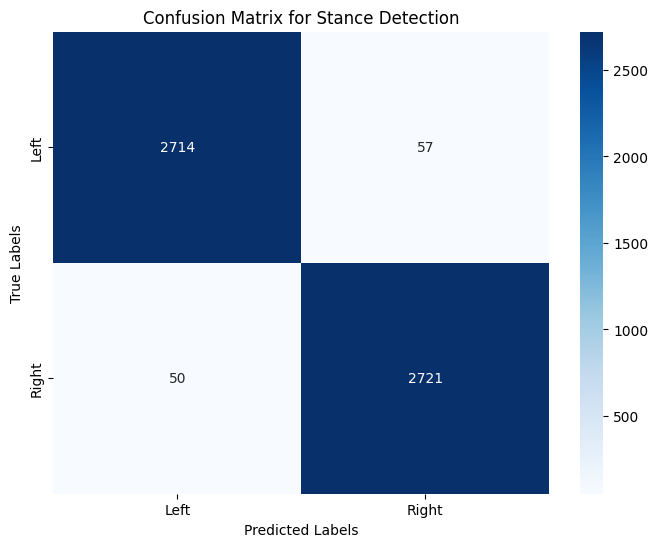

In [10]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Left', 'Right'], yticklabels=['Left', 'Right'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Stance Detection")
plt.show()

In [11]:
# Show feature importance (top features per class)
feature_names = vectorizer.get_feature_names_out()
coefs = log_reg.coef_.flatten()
top_features_left = np.argsort(coefs)[:10]
top_features_right = np.argsort(coefs)[-10:]

print("Top features for left-leaning stance:")
for i in top_features_left:
    print(f"{feature_names[i]}: {coefs[i]}")

print("\nTop features for right-leaning stance:")
for i in top_features_right:
    print(f"{feature_names[i]}: {coefs[i]}")

Top features for left-leaning stance:
reduce: -4.86272888522897
provide: -4.596211981269582
access: -4.104419372127226
prevent: -3.9517185716122896
workers: -3.7298083526627113
diversity: -3.6798978591297202
equal: -3.6191947158236686
ensure: -3.469710575717782
abolished: -3.4387006444673207
address: -3.346635953799457

Top features for right-leaning stance:
responsible: 3.5367145134367344
hinder: 3.685246321453953
businesses: 3.7196811054033403
interests: 3.810055288590947
competition: 4.066424954072689
responsibility: 4.181394869443662
merit: 4.206360680142668
individual: 4.860992272199338
private: 5.141942135457452
market: 7.115848365543192
